In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [65]:
df=pd.read_csv(r"../data/attrition_data_with_calculated_columns.csv")
df.drop(['EMP_ID', 'TERMINATION_YEAR', 'REFERRAL_SOURCE', 'COMBINED_JOB_GROUP', 'DISCRETIZED_ANNUAL_RATE', 'DISCRETIZED_AGE', 'PREVYR_1_PRESENT', 'PREVYR_2_PRESENT', 'PREVYR_3_PRESENT', 'PREVYR_4_PRESENT', 'PREVYR_5_PRESENT', 'employee_cnt', 'white_rate', 'asian_rate', 'black_rate', 'hispa_rate'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [66]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [67]:
x = pd.get_dummies(x, columns=['ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [68]:
to_be_label_encoded = ['EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [70]:
parameters = {"learning_rate": [0.1,0.05],"max_depth": [5,10],'loss_function':['Logloss', 'CrossEntropy'],"n_estimators":[100,200]}
cat_model = CatBoostClassifier(random_state=42)
gridsearchcat  = GridSearchCV(cat_model, parameters,cv=4,verbose=3)
gridsearchcat.fit(x_train, y_train)
y_pred = gridsearchcat.predict(x_test)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] learning_rate=0.1, loss_function=Logloss, max_depth=5, n_estimators=100 
0:	learn: 0.6803784	total: 7.87ms	remaining: 779ms
1:	learn: 0.6701178	total: 15.6ms	remaining: 764ms
2:	learn: 0.6570041	total: 26.4ms	remaining: 852ms
3:	learn: 0.6481731	total: 33.2ms	remaining: 797ms
4:	learn: 0.6405925	total: 38ms	remaining: 721ms
5:	learn: 0.6342247	total: 47.1ms	remaining: 738ms
6:	learn: 0.6274927	total: 54.6ms	remaining: 725ms
7:	learn: 0.6213889	total: 61ms	remaining: 702ms
8:	learn: 0.6161505	total: 65.7ms	remaining: 665ms
9:	learn: 0.6126069	total: 71.4ms	remaining: 642ms
10:	learn: 0.6086380	total: 76.6ms	remaining: 620ms
11:	learn: 0.6039142	total: 84.5ms	remaining: 620ms
12:	learn: 0.6005977	total: 91ms	remaining: 609ms
13:	learn: 0.5963605	total: 95.7ms	remaining: 588ms
14:	learn: 0.5927015	total: 99.3ms	remaining: 563ms
15:	learn: 0.5914425	total: 106ms	remaining: 558ms
16:	learn: 0.5869649	total: 111ms	remaining: 5

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


22:	learn: 0.5761580	total: 138ms	remaining: 460ms
23:	learn: 0.5742933	total: 142ms	remaining: 451ms
24:	learn: 0.5729042	total: 147ms	remaining: 442ms
25:	learn: 0.5715445	total: 156ms	remaining: 443ms
26:	learn: 0.5704797	total: 159ms	remaining: 430ms
27:	learn: 0.5685177	total: 162ms	remaining: 416ms
28:	learn: 0.5672518	total: 166ms	remaining: 407ms
29:	learn: 0.5660647	total: 172ms	remaining: 400ms
30:	learn: 0.5643034	total: 175ms	remaining: 389ms
31:	learn: 0.5633515	total: 178ms	remaining: 379ms
32:	learn: 0.5622261	total: 185ms	remaining: 376ms
33:	learn: 0.5614012	total: 194ms	remaining: 376ms
34:	learn: 0.5592230	total: 201ms	remaining: 373ms
35:	learn: 0.5585705	total: 206ms	remaining: 366ms
36:	learn: 0.5573442	total: 209ms	remaining: 356ms
37:	learn: 0.5552868	total: 213ms	remaining: 347ms
38:	learn: 0.5542570	total: 216ms	remaining: 338ms
39:	learn: 0.5533726	total: 220ms	remaining: 329ms
40:	learn: 0.5525757	total: 222ms	remaining: 320ms
41:	learn: 0.5514869	total: 225

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


4:	learn: 0.6358728	total: 18.4ms	remaining: 349ms
5:	learn: 0.6328199	total: 21.3ms	remaining: 334ms
6:	learn: 0.6268765	total: 25.1ms	remaining: 334ms
7:	learn: 0.6208200	total: 29.7ms	remaining: 341ms
8:	learn: 0.6154650	total: 33.9ms	remaining: 343ms
9:	learn: 0.6100788	total: 39.4ms	remaining: 355ms
10:	learn: 0.6062770	total: 46.4ms	remaining: 376ms
11:	learn: 0.6035363	total: 49.3ms	remaining: 361ms
12:	learn: 0.5978034	total: 52ms	remaining: 348ms
13:	learn: 0.5938194	total: 58.5ms	remaining: 359ms
14:	learn: 0.5894562	total: 61.8ms	remaining: 350ms
15:	learn: 0.5870803	total: 64.9ms	remaining: 341ms
16:	learn: 0.5838476	total: 69.3ms	remaining: 338ms
17:	learn: 0.5812815	total: 72.8ms	remaining: 332ms
18:	learn: 0.5791140	total: 75.3ms	remaining: 321ms
19:	learn: 0.5771313	total: 78.2ms	remaining: 313ms
20:	learn: 0.5753898	total: 80.8ms	remaining: 304ms
21:	learn: 0.5726397	total: 84ms	remaining: 298ms
22:	learn: 0.5712834	total: 86.4ms	remaining: 289ms
23:	learn: 0.5694082	t

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


6:	learn: 0.6271178	total: 28ms	remaining: 372ms
7:	learn: 0.6214118	total: 32.7ms	remaining: 376ms
8:	learn: 0.6165521	total: 35.7ms	remaining: 361ms
9:	learn: 0.6115643	total: 38.2ms	remaining: 344ms
10:	learn: 0.6084109	total: 43ms	remaining: 348ms
11:	learn: 0.6041953	total: 47.9ms	remaining: 352ms
12:	learn: 0.6008307	total: 52.1ms	remaining: 349ms
13:	learn: 0.5965818	total: 54.8ms	remaining: 336ms
14:	learn: 0.5945352	total: 58.4ms	remaining: 331ms
15:	learn: 0.5912611	total: 62.6ms	remaining: 329ms
16:	learn: 0.5877904	total: 65.8ms	remaining: 321ms
17:	learn: 0.5857053	total: 68.6ms	remaining: 313ms
18:	learn: 0.5826840	total: 71.3ms	remaining: 304ms
19:	learn: 0.5793884	total: 75.3ms	remaining: 301ms
20:	learn: 0.5784068	total: 79.5ms	remaining: 299ms
21:	learn: 0.5772057	total: 84.1ms	remaining: 298ms
22:	learn: 0.5760026	total: 87.8ms	remaining: 294ms
23:	learn: 0.5743543	total: 93.4ms	remaining: 296ms
24:	learn: 0.5721749	total: 96.2ms	remaining: 289ms
25:	learn: 0.5707023

[CV]  learning_rate=0.1, loss_function=Logloss, max_depth=5, n_estimators=100, score=0.734, total=   0.4s
[CV] learning_rate=0.1, loss_function=Logloss, max_depth=5, n_estimators=200 
0:	learn: 0.6803784	total: 3.4ms	remaining: 676ms
1:	learn: 0.6701178	total: 6.32ms	remaining: 626ms
2:	learn: 0.6570041	total: 14ms	remaining: 918ms
3:	learn: 0.6481731	total: 17.4ms	remaining: 851ms
4:	learn: 0.6405925	total: 20.1ms	remaining: 784ms
5:	learn: 0.6342247	total: 24ms	remaining: 778ms
6:	learn: 0.6274927	total: 27.3ms	remaining: 752ms
7:	learn: 0.6213889	total: 30.3ms	remaining: 727ms
8:	learn: 0.6161505	total: 33.5ms	remaining: 711ms
9:	learn: 0.6126069	total: 36ms	remaining: 684ms
10:	learn: 0.6086380	total: 39.9ms	remaining: 686ms
11:	learn: 0.6039142	total: 42.8ms	remaining: 671ms
12:	learn: 0.6005977	total: 46ms	remaining: 661ms
13:	learn: 0.5963605	total: 50.7ms	remaining: 674ms
14:	learn: 0.5927015	total: 53.7ms	remaining: 663ms
15:	learn: 0.5914425	total: 60.3ms	remaining: 693ms
16:

160:	learn: 0.4460542	total: 559ms	remaining: 135ms
161:	learn: 0.4452804	total: 562ms	remaining: 132ms
162:	learn: 0.4448200	total: 566ms	remaining: 128ms
163:	learn: 0.4440999	total: 568ms	remaining: 125ms
164:	learn: 0.4432998	total: 570ms	remaining: 121ms
165:	learn: 0.4428903	total: 574ms	remaining: 118ms
166:	learn: 0.4422176	total: 581ms	remaining: 115ms
167:	learn: 0.4418590	total: 586ms	remaining: 112ms
168:	learn: 0.4412524	total: 593ms	remaining: 109ms
169:	learn: 0.4399975	total: 596ms	remaining: 105ms
170:	learn: 0.4393940	total: 599ms	remaining: 102ms
171:	learn: 0.4390747	total: 602ms	remaining: 98ms
172:	learn: 0.4386481	total: 606ms	remaining: 94.5ms
173:	learn: 0.4379378	total: 609ms	remaining: 90.9ms
174:	learn: 0.4373726	total: 612ms	remaining: 87.4ms
175:	learn: 0.4366046	total: 616ms	remaining: 83.9ms
176:	learn: 0.4358390	total: 618ms	remaining: 80.3ms
177:	learn: 0.4351174	total: 621ms	remaining: 76.8ms
178:	learn: 0.4346819	total: 625ms	remaining: 73.3ms
179:	l

128:	learn: 0.4635895	total: 426ms	remaining: 234ms
129:	learn: 0.4628860	total: 432ms	remaining: 232ms
130:	learn: 0.4625030	total: 439ms	remaining: 231ms
131:	learn: 0.4619616	total: 442ms	remaining: 228ms
132:	learn: 0.4610337	total: 449ms	remaining: 226ms
133:	learn: 0.4606113	total: 455ms	remaining: 224ms
134:	learn: 0.4598858	total: 458ms	remaining: 220ms
135:	learn: 0.4594852	total: 461ms	remaining: 217ms
136:	learn: 0.4590019	total: 466ms	remaining: 214ms
137:	learn: 0.4582080	total: 469ms	remaining: 211ms
138:	learn: 0.4575881	total: 471ms	remaining: 207ms
139:	learn: 0.4568861	total: 474ms	remaining: 203ms
140:	learn: 0.4564285	total: 479ms	remaining: 200ms
141:	learn: 0.4556719	total: 483ms	remaining: 197ms
142:	learn: 0.4544691	total: 486ms	remaining: 194ms
143:	learn: 0.4539995	total: 489ms	remaining: 190ms
144:	learn: 0.4531005	total: 492ms	remaining: 187ms
145:	learn: 0.4525635	total: 497ms	remaining: 184ms
146:	learn: 0.4519930	total: 502ms	remaining: 181ms
147:	learn: 

100:	learn: 0.4902490	total: 288ms	remaining: 283ms
101:	learn: 0.4888969	total: 291ms	remaining: 280ms
102:	learn: 0.4884227	total: 293ms	remaining: 276ms
103:	learn: 0.4872954	total: 296ms	remaining: 273ms
104:	learn: 0.4865050	total: 299ms	remaining: 270ms
105:	learn: 0.4851687	total: 306ms	remaining: 272ms
106:	learn: 0.4845080	total: 309ms	remaining: 269ms
107:	learn: 0.4831101	total: 312ms	remaining: 266ms
108:	learn: 0.4811409	total: 315ms	remaining: 263ms
109:	learn: 0.4804973	total: 319ms	remaining: 261ms
110:	learn: 0.4797248	total: 321ms	remaining: 257ms
111:	learn: 0.4786571	total: 324ms	remaining: 255ms
112:	learn: 0.4778156	total: 327ms	remaining: 252ms
113:	learn: 0.4772257	total: 332ms	remaining: 250ms
114:	learn: 0.4762675	total: 335ms	remaining: 248ms
115:	learn: 0.4746399	total: 338ms	remaining: 245ms
116:	learn: 0.4739965	total: 343ms	remaining: 243ms
117:	learn: 0.4734875	total: 348ms	remaining: 242ms
118:	learn: 0.4728190	total: 351ms	remaining: 239ms
119:	learn: 

55:	learn: 0.5348344	total: 197ms	remaining: 505ms
56:	learn: 0.5334674	total: 200ms	remaining: 502ms
57:	learn: 0.5322983	total: 204ms	remaining: 499ms
58:	learn: 0.5313985	total: 206ms	remaining: 493ms
59:	learn: 0.5305810	total: 209ms	remaining: 489ms
60:	learn: 0.5298269	total: 213ms	remaining: 485ms
61:	learn: 0.5287406	total: 215ms	remaining: 479ms
62:	learn: 0.5280586	total: 218ms	remaining: 474ms
63:	learn: 0.5273652	total: 220ms	remaining: 468ms
64:	learn: 0.5264850	total: 222ms	remaining: 462ms
65:	learn: 0.5260013	total: 225ms	remaining: 456ms
66:	learn: 0.5253496	total: 229ms	remaining: 454ms
67:	learn: 0.5247877	total: 233ms	remaining: 453ms
68:	learn: 0.5242664	total: 237ms	remaining: 449ms
69:	learn: 0.5235779	total: 239ms	remaining: 444ms
70:	learn: 0.5228580	total: 241ms	remaining: 438ms
71:	learn: 0.5223081	total: 244ms	remaining: 434ms
72:	learn: 0.5215775	total: 249ms	remaining: 433ms
73:	learn: 0.5205074	total: 254ms	remaining: 433ms
74:	learn: 0.5197714	total: 257

10:	learn: 0.5640832	total: 198ms	remaining: 1.6s
11:	learn: 0.5611837	total: 209ms	remaining: 1.53s
12:	learn: 0.5533379	total: 231ms	remaining: 1.55s
13:	learn: 0.5493542	total: 249ms	remaining: 1.53s
14:	learn: 0.5417324	total: 264ms	remaining: 1.5s
15:	learn: 0.5379707	total: 282ms	remaining: 1.48s
16:	learn: 0.5343757	total: 296ms	remaining: 1.45s
17:	learn: 0.5302407	total: 311ms	remaining: 1.41s
18:	learn: 0.5240214	total: 324ms	remaining: 1.38s
19:	learn: 0.5197586	total: 343ms	remaining: 1.37s
20:	learn: 0.5143272	total: 358ms	remaining: 1.35s
21:	learn: 0.5125603	total: 387ms	remaining: 1.37s
22:	learn: 0.5082796	total: 403ms	remaining: 1.35s
23:	learn: 0.5070252	total: 407ms	remaining: 1.29s
24:	learn: 0.5031165	total: 421ms	remaining: 1.26s
25:	learn: 0.4978432	total: 436ms	remaining: 1.24s
26:	learn: 0.4944647	total: 452ms	remaining: 1.22s
27:	learn: 0.4914089	total: 468ms	remaining: 1.2s
28:	learn: 0.4863806	total: 482ms	remaining: 1.18s
29:	learn: 0.4840956	total: 499ms	

69:	learn: 0.3768833	total: 1.12s	remaining: 482ms
70:	learn: 0.3748213	total: 1.15s	remaining: 468ms
71:	learn: 0.3728820	total: 1.16s	remaining: 452ms
72:	learn: 0.3710243	total: 1.18s	remaining: 436ms
73:	learn: 0.3696674	total: 1.2s	remaining: 421ms
74:	learn: 0.3677742	total: 1.22s	remaining: 405ms
75:	learn: 0.3663105	total: 1.23s	remaining: 389ms
76:	learn: 0.3640519	total: 1.25s	remaining: 372ms
77:	learn: 0.3627776	total: 1.27s	remaining: 358ms
78:	learn: 0.3600166	total: 1.29s	remaining: 343ms
79:	learn: 0.3588077	total: 1.31s	remaining: 328ms
80:	learn: 0.3571003	total: 1.33s	remaining: 312ms
81:	learn: 0.3546702	total: 1.34s	remaining: 295ms
82:	learn: 0.3534316	total: 1.36s	remaining: 278ms
83:	learn: 0.3524865	total: 1.38s	remaining: 262ms
84:	learn: 0.3483544	total: 1.4s	remaining: 246ms
85:	learn: 0.3453163	total: 1.41s	remaining: 230ms
86:	learn: 0.3441331	total: 1.43s	remaining: 213ms
87:	learn: 0.3439857	total: 1.43s	remaining: 195ms
88:	learn: 0.3429303	total: 1.45s

27:	learn: 0.4968636	total: 425ms	remaining: 1.09s
28:	learn: 0.4946268	total: 439ms	remaining: 1.07s
29:	learn: 0.4915139	total: 457ms	remaining: 1.06s
30:	learn: 0.4894913	total: 471ms	remaining: 1.05s
31:	learn: 0.4870936	total: 490ms	remaining: 1.04s
32:	learn: 0.4849212	total: 509ms	remaining: 1.03s
33:	learn: 0.4821572	total: 525ms	remaining: 1.02s
34:	learn: 0.4785540	total: 543ms	remaining: 1.01s
35:	learn: 0.4763734	total: 557ms	remaining: 990ms
36:	learn: 0.4743197	total: 574ms	remaining: 978ms
37:	learn: 0.4729871	total: 588ms	remaining: 959ms
38:	learn: 0.4689008	total: 604ms	remaining: 945ms
39:	learn: 0.4663085	total: 621ms	remaining: 931ms
40:	learn: 0.4643359	total: 637ms	remaining: 917ms
41:	learn: 0.4635058	total: 653ms	remaining: 902ms
42:	learn: 0.4609130	total: 672ms	remaining: 891ms
43:	learn: 0.4556534	total: 688ms	remaining: 876ms
44:	learn: 0.4488645	total: 709ms	remaining: 866ms
45:	learn: 0.4473011	total: 726ms	remaining: 852ms
46:	learn: 0.4452974	total: 744

93:	learn: 0.3267720	total: 1.45s	remaining: 1.64s
94:	learn: 0.3249948	total: 1.47s	remaining: 1.62s
95:	learn: 0.3229250	total: 1.49s	remaining: 1.61s
96:	learn: 0.3209869	total: 1.5s	remaining: 1.6s
97:	learn: 0.3200610	total: 1.52s	remaining: 1.58s
98:	learn: 0.3177736	total: 1.53s	remaining: 1.56s
99:	learn: 0.3166192	total: 1.55s	remaining: 1.55s
100:	learn: 0.3145746	total: 1.57s	remaining: 1.53s
101:	learn: 0.3136447	total: 1.58s	remaining: 1.52s
102:	learn: 0.3098182	total: 1.6s	remaining: 1.5s
103:	learn: 0.3066521	total: 1.61s	remaining: 1.49s
104:	learn: 0.3055989	total: 1.63s	remaining: 1.47s
105:	learn: 0.3044326	total: 1.65s	remaining: 1.46s
106:	learn: 0.3034172	total: 1.66s	remaining: 1.44s
107:	learn: 0.3020919	total: 1.68s	remaining: 1.43s
108:	learn: 0.3010244	total: 1.69s	remaining: 1.41s
109:	learn: 0.2997349	total: 1.71s	remaining: 1.4s
110:	learn: 0.2981290	total: 1.72s	remaining: 1.38s
111:	learn: 0.2972289	total: 1.73s	remaining: 1.36s
112:	learn: 0.2958298	to

56:	learn: 0.4079765	total: 958ms	remaining: 2.4s
57:	learn: 0.4033948	total: 978ms	remaining: 2.4s
58:	learn: 0.4018904	total: 997ms	remaining: 2.38s
59:	learn: 0.3983936	total: 1.01s	remaining: 2.36s
60:	learn: 0.3960456	total: 1.03s	remaining: 2.35s
61:	learn: 0.3935676	total: 1.05s	remaining: 2.33s
62:	learn: 0.3917071	total: 1.07s	remaining: 2.32s
63:	learn: 0.3890620	total: 1.08s	remaining: 2.3s
64:	learn: 0.3875732	total: 1.1s	remaining: 2.28s
65:	learn: 0.3865814	total: 1.11s	remaining: 2.26s
66:	learn: 0.3822505	total: 1.13s	remaining: 2.24s
67:	learn: 0.3802423	total: 1.14s	remaining: 2.22s
68:	learn: 0.3786350	total: 1.16s	remaining: 2.2s
69:	learn: 0.3768833	total: 1.18s	remaining: 2.19s
70:	learn: 0.3748213	total: 1.2s	remaining: 2.17s
71:	learn: 0.3728820	total: 1.22s	remaining: 2.16s
72:	learn: 0.3710243	total: 1.23s	remaining: 2.14s
73:	learn: 0.3696674	total: 1.25s	remaining: 2.12s
74:	learn: 0.3677742	total: 1.26s	remaining: 2.1s
75:	learn: 0.3663105	total: 1.28s	rema

16:	learn: 0.5313299	total: 278ms	remaining: 2.99s
17:	learn: 0.5277060	total: 295ms	remaining: 2.99s
18:	learn: 0.5233968	total: 307ms	remaining: 2.92s
19:	learn: 0.5201839	total: 325ms	remaining: 2.93s
20:	learn: 0.5170047	total: 339ms	remaining: 2.89s
21:	learn: 0.5130144	total: 355ms	remaining: 2.87s
22:	learn: 0.5086097	total: 371ms	remaining: 2.85s
23:	learn: 0.5053595	total: 387ms	remaining: 2.83s
24:	learn: 0.4979509	total: 406ms	remaining: 2.84s
25:	learn: 0.4963146	total: 421ms	remaining: 2.82s
26:	learn: 0.4932144	total: 438ms	remaining: 2.8s
27:	learn: 0.4889590	total: 453ms	remaining: 2.78s
28:	learn: 0.4868127	total: 470ms	remaining: 2.77s
29:	learn: 0.4853156	total: 490ms	remaining: 2.77s
30:	learn: 0.4830974	total: 505ms	remaining: 2.75s
31:	learn: 0.4801788	total: 522ms	remaining: 2.74s
32:	learn: 0.4755443	total: 541ms	remaining: 2.74s
33:	learn: 0.4736104	total: 555ms	remaining: 2.71s
34:	learn: 0.4714279	total: 573ms	remaining: 2.7s
35:	learn: 0.4671697	total: 591ms

178:	learn: 0.2201088	total: 3s	remaining: 352ms
179:	learn: 0.2185003	total: 3.01s	remaining: 335ms
180:	learn: 0.2175413	total: 3.03s	remaining: 318ms
181:	learn: 0.2161472	total: 3.05s	remaining: 301ms
182:	learn: 0.2150356	total: 3.06s	remaining: 285ms
183:	learn: 0.2136283	total: 3.08s	remaining: 268ms
184:	learn: 0.2124124	total: 3.1s	remaining: 252ms
185:	learn: 0.2106158	total: 3.12s	remaining: 235ms
186:	learn: 0.2086821	total: 3.14s	remaining: 218ms
187:	learn: 0.2073409	total: 3.15s	remaining: 201ms
188:	learn: 0.2064009	total: 3.17s	remaining: 185ms
189:	learn: 0.2048045	total: 3.19s	remaining: 168ms
190:	learn: 0.2034490	total: 3.21s	remaining: 151ms
191:	learn: 0.2027063	total: 3.23s	remaining: 134ms
192:	learn: 0.2020985	total: 3.25s	remaining: 118ms
193:	learn: 0.2015385	total: 3.26s	remaining: 101ms
194:	learn: 0.1999115	total: 3.28s	remaining: 84.1ms
195:	learn: 0.1994588	total: 3.3s	remaining: 67.3ms
196:	learn: 0.1981460	total: 3.31s	remaining: 50.5ms
197:	learn: 0.

143:	learn: 0.2668825	total: 2.72s	remaining: 1.06s
144:	learn: 0.2664053	total: 2.74s	remaining: 1.04s
145:	learn: 0.2655277	total: 2.76s	remaining: 1.02s
146:	learn: 0.2648610	total: 2.78s	remaining: 1s
147:	learn: 0.2640773	total: 2.8s	remaining: 983ms
148:	learn: 0.2620104	total: 2.81s	remaining: 964ms
149:	learn: 0.2599351	total: 2.83s	remaining: 945ms
150:	learn: 0.2578589	total: 2.85s	remaining: 926ms
151:	learn: 0.2574127	total: 2.87s	remaining: 906ms
152:	learn: 0.2565683	total: 2.89s	remaining: 888ms
153:	learn: 0.2558922	total: 2.91s	remaining: 869ms
154:	learn: 0.2546245	total: 2.93s	remaining: 850ms
155:	learn: 0.2529819	total: 2.95s	remaining: 831ms
156:	learn: 0.2519014	total: 2.96s	remaining: 811ms
157:	learn: 0.2510515	total: 2.98s	remaining: 792ms
158:	learn: 0.2490003	total: 3s	remaining: 773ms
159:	learn: 0.2480976	total: 3.02s	remaining: 754ms
160:	learn: 0.2469243	total: 3.04s	remaining: 735ms
161:	learn: 0.2462218	total: 3.06s	remaining: 717ms
162:	learn: 0.24448

5:	learn: 0.6328199	total: 25.5ms	remaining: 400ms
6:	learn: 0.6268765	total: 30.3ms	remaining: 402ms
7:	learn: 0.6208200	total: 34.1ms	remaining: 392ms
8:	learn: 0.6154650	total: 36.9ms	remaining: 373ms
9:	learn: 0.6100788	total: 39.8ms	remaining: 358ms
10:	learn: 0.6062770	total: 44.4ms	remaining: 359ms
11:	learn: 0.6035363	total: 49.4ms	remaining: 362ms
12:	learn: 0.5978034	total: 53.7ms	remaining: 359ms
13:	learn: 0.5938194	total: 56.5ms	remaining: 347ms
14:	learn: 0.5894562	total: 61.5ms	remaining: 349ms
15:	learn: 0.5870803	total: 64.8ms	remaining: 340ms
16:	learn: 0.5838476	total: 67.6ms	remaining: 330ms
17:	learn: 0.5812815	total: 70.5ms	remaining: 321ms
18:	learn: 0.5791140	total: 74.6ms	remaining: 318ms
19:	learn: 0.5771313	total: 78.5ms	remaining: 314ms
20:	learn: 0.5753898	total: 85.7ms	remaining: 322ms
21:	learn: 0.5726397	total: 88.8ms	remaining: 315ms
22:	learn: 0.5712834	total: 92.3ms	remaining: 309ms
23:	learn: 0.5694082	total: 96.1ms	remaining: 304ms
24:	learn: 0.5679

80:	learn: 0.5111623	total: 341ms	remaining: 80ms
81:	learn: 0.5094004	total: 346ms	remaining: 75.9ms
82:	learn: 0.5085391	total: 351ms	remaining: 71.8ms
83:	learn: 0.5078608	total: 354ms	remaining: 67.4ms
84:	learn: 0.5068532	total: 357ms	remaining: 63.1ms
85:	learn: 0.5055034	total: 363ms	remaining: 59ms
86:	learn: 0.5043482	total: 368ms	remaining: 54.9ms
87:	learn: 0.5037270	total: 371ms	remaining: 50.6ms
88:	learn: 0.5030677	total: 374ms	remaining: 46.2ms
89:	learn: 0.5020787	total: 382ms	remaining: 42.4ms
90:	learn: 0.5010473	total: 385ms	remaining: 38.1ms
91:	learn: 0.4993702	total: 388ms	remaining: 33.7ms
92:	learn: 0.4985284	total: 392ms	remaining: 29.5ms
93:	learn: 0.4963941	total: 398ms	remaining: 25.4ms
94:	learn: 0.4960425	total: 402ms	remaining: 21.2ms
95:	learn: 0.4953298	total: 407ms	remaining: 16.9ms
96:	learn: 0.4943263	total: 412ms	remaining: 12.8ms
97:	learn: 0.4931307	total: 416ms	remaining: 8.48ms
98:	learn: 0.4920583	total: 423ms	remaining: 4.27ms
99:	learn: 0.491

52:	learn: 0.5387649	total: 210ms	remaining: 582ms
53:	learn: 0.5380556	total: 213ms	remaining: 577ms
54:	learn: 0.5369890	total: 218ms	remaining: 574ms
55:	learn: 0.5360929	total: 221ms	remaining: 569ms
56:	learn: 0.5353214	total: 224ms	remaining: 563ms
57:	learn: 0.5350268	total: 228ms	remaining: 559ms
58:	learn: 0.5342145	total: 233ms	remaining: 557ms
59:	learn: 0.5335656	total: 237ms	remaining: 552ms
60:	learn: 0.5328993	total: 240ms	remaining: 546ms
61:	learn: 0.5322347	total: 243ms	remaining: 540ms
62:	learn: 0.5316856	total: 247ms	remaining: 537ms
63:	learn: 0.5302375	total: 250ms	remaining: 532ms
64:	learn: 0.5284436	total: 254ms	remaining: 527ms
65:	learn: 0.5278061	total: 259ms	remaining: 525ms
66:	learn: 0.5273289	total: 264ms	remaining: 523ms
67:	learn: 0.5266284	total: 268ms	remaining: 520ms
68:	learn: 0.5252695	total: 272ms	remaining: 517ms
69:	learn: 0.5245986	total: 276ms	remaining: 513ms
70:	learn: 0.5241135	total: 281ms	remaining: 511ms
71:	learn: 0.5236273	total: 285

34:	learn: 0.5528020	total: 146ms	remaining: 690ms
35:	learn: 0.5511423	total: 150ms	remaining: 682ms
36:	learn: 0.5504913	total: 154ms	remaining: 680ms
37:	learn: 0.5490677	total: 158ms	remaining: 673ms
38:	learn: 0.5477513	total: 161ms	remaining: 664ms
39:	learn: 0.5461186	total: 164ms	remaining: 655ms
40:	learn: 0.5449721	total: 167ms	remaining: 649ms
41:	learn: 0.5433467	total: 171ms	remaining: 645ms
42:	learn: 0.5427570	total: 175ms	remaining: 639ms
43:	learn: 0.5420733	total: 179ms	remaining: 634ms
44:	learn: 0.5406123	total: 182ms	remaining: 626ms
45:	learn: 0.5387062	total: 187ms	remaining: 625ms
46:	learn: 0.5375541	total: 190ms	remaining: 619ms
47:	learn: 0.5369891	total: 193ms	remaining: 611ms
48:	learn: 0.5357832	total: 196ms	remaining: 605ms
49:	learn: 0.5348475	total: 200ms	remaining: 599ms
50:	learn: 0.5335717	total: 208ms	remaining: 607ms
51:	learn: 0.5326489	total: 211ms	remaining: 601ms
52:	learn: 0.5312203	total: 214ms	remaining: 593ms
53:	learn: 0.5305865	total: 217

24:	learn: 0.5721749	total: 93.8ms	remaining: 657ms
25:	learn: 0.5707023	total: 97.8ms	remaining: 655ms
26:	learn: 0.5682941	total: 102ms	remaining: 653ms
27:	learn: 0.5672906	total: 106ms	remaining: 652ms
28:	learn: 0.5644205	total: 109ms	remaining: 643ms
29:	learn: 0.5634989	total: 112ms	remaining: 635ms
30:	learn: 0.5626674	total: 116ms	remaining: 631ms
31:	learn: 0.5611697	total: 121ms	remaining: 634ms
32:	learn: 0.5594441	total: 124ms	remaining: 627ms
33:	learn: 0.5580443	total: 128ms	remaining: 624ms
34:	learn: 0.5571154	total: 132ms	remaining: 620ms
35:	learn: 0.5563780	total: 137ms	remaining: 625ms
36:	learn: 0.5551005	total: 141ms	remaining: 622ms
37:	learn: 0.5529362	total: 144ms	remaining: 615ms
38:	learn: 0.5521963	total: 150ms	remaining: 618ms
39:	learn: 0.5506283	total: 153ms	remaining: 612ms
40:	learn: 0.5498971	total: 156ms	remaining: 605ms
41:	learn: 0.5480336	total: 159ms	remaining: 598ms
42:	learn: 0.5467194	total: 162ms	remaining: 593ms
43:	learn: 0.5453294	total: 1

4:	learn: 0.6350413	total: 20.2ms	remaining: 789ms
5:	learn: 0.6298584	total: 27.8ms	remaining: 900ms
6:	learn: 0.6244075	total: 31.2ms	remaining: 860ms
7:	learn: 0.6205922	total: 35.6ms	remaining: 855ms
8:	learn: 0.6157289	total: 41.8ms	remaining: 888ms
9:	learn: 0.6088722	total: 45.2ms	remaining: 859ms
10:	learn: 0.6053890	total: 48.5ms	remaining: 834ms
11:	learn: 0.6017460	total: 51.7ms	remaining: 810ms
12:	learn: 0.5978524	total: 57.8ms	remaining: 832ms
13:	learn: 0.5948285	total: 62.3ms	remaining: 828ms
14:	learn: 0.5914502	total: 65.3ms	remaining: 806ms
15:	learn: 0.5892972	total: 68.2ms	remaining: 785ms
16:	learn: 0.5865759	total: 73.9ms	remaining: 796ms
17:	learn: 0.5842844	total: 77.4ms	remaining: 783ms
18:	learn: 0.5825896	total: 80.5ms	remaining: 767ms
19:	learn: 0.5806986	total: 83.7ms	remaining: 754ms
20:	learn: 0.5789691	total: 86.9ms	remaining: 741ms
21:	learn: 0.5764093	total: 92.7ms	remaining: 750ms
22:	learn: 0.5741606	total: 96ms	remaining: 739ms
23:	learn: 0.5724952

191:	learn: 0.4314324	total: 805ms	remaining: 33.5ms
192:	learn: 0.4307944	total: 813ms	remaining: 29.5ms
193:	learn: 0.4302463	total: 816ms	remaining: 25.2ms
194:	learn: 0.4294966	total: 819ms	remaining: 21ms
195:	learn: 0.4289713	total: 822ms	remaining: 16.8ms
196:	learn: 0.4283715	total: 827ms	remaining: 12.6ms
197:	learn: 0.4277213	total: 831ms	remaining: 8.39ms
198:	learn: 0.4271741	total: 834ms	remaining: 4.19ms
199:	learn: 0.4265156	total: 838ms	remaining: 0us
[CV]  learning_rate=0.1, loss_function=CrossEntropy, max_depth=5, n_estimators=200, score=0.745, total=   0.9s
[CV] learning_rate=0.1, loss_function=CrossEntropy, max_depth=10, n_estimators=100 
0:	learn: 0.6744061	total: 17.6ms	remaining: 1.75s
1:	learn: 0.6558993	total: 37ms	remaining: 1.81s
2:	learn: 0.6418699	total: 51ms	remaining: 1.65s
3:	learn: 0.6282138	total: 69.1ms	remaining: 1.66s
4:	learn: 0.6128628	total: 85.4ms	remaining: 1.62s
5:	learn: 0.6011546	total: 105ms	remaining: 1.65s
6:	learn: 0.5911634	total: 124ms

53:	learn: 0.4131260	total: 1.06s	remaining: 905ms
54:	learn: 0.4108966	total: 1.08s	remaining: 888ms
55:	learn: 0.4091205	total: 1.1s	remaining: 864ms
56:	learn: 0.4079765	total: 1.12s	remaining: 847ms
57:	learn: 0.4033948	total: 1.14s	remaining: 825ms
58:	learn: 0.4018904	total: 1.16s	remaining: 806ms
59:	learn: 0.3983936	total: 1.18s	remaining: 786ms
60:	learn: 0.3960456	total: 1.21s	remaining: 771ms
61:	learn: 0.3935676	total: 1.23s	remaining: 757ms
62:	learn: 0.3917071	total: 1.27s	remaining: 744ms
63:	learn: 0.3890620	total: 1.29s	remaining: 727ms
64:	learn: 0.3875732	total: 1.31s	remaining: 707ms
65:	learn: 0.3865814	total: 1.33s	remaining: 685ms
66:	learn: 0.3822505	total: 1.35s	remaining: 664ms
67:	learn: 0.3802423	total: 1.36s	remaining: 643ms
68:	learn: 0.3786350	total: 1.38s	remaining: 620ms
69:	learn: 0.3768833	total: 1.4s	remaining: 599ms
70:	learn: 0.3748213	total: 1.41s	remaining: 577ms
71:	learn: 0.3728820	total: 1.43s	remaining: 558ms
72:	learn: 0.3710243	total: 1.45s

11:	learn: 0.5582216	total: 220ms	remaining: 1.61s
12:	learn: 0.5528067	total: 245ms	remaining: 1.64s
13:	learn: 0.5477212	total: 266ms	remaining: 1.64s
14:	learn: 0.5463057	total: 270ms	remaining: 1.53s
15:	learn: 0.5423035	total: 292ms	remaining: 1.53s
16:	learn: 0.5374500	total: 310ms	remaining: 1.51s
17:	learn: 0.5315382	total: 329ms	remaining: 1.5s
18:	learn: 0.5265513	total: 347ms	remaining: 1.48s
19:	learn: 0.5232439	total: 369ms	remaining: 1.48s
20:	learn: 0.5206027	total: 387ms	remaining: 1.45s
21:	learn: 0.5169111	total: 412ms	remaining: 1.46s
22:	learn: 0.5137491	total: 432ms	remaining: 1.44s
23:	learn: 0.5107293	total: 450ms	remaining: 1.42s
24:	learn: 0.5069784	total: 467ms	remaining: 1.4s
25:	learn: 0.5029625	total: 487ms	remaining: 1.39s
26:	learn: 0.4998640	total: 510ms	remaining: 1.38s
27:	learn: 0.4968636	total: 528ms	remaining: 1.36s
28:	learn: 0.4946268	total: 544ms	remaining: 1.33s
29:	learn: 0.4915139	total: 564ms	remaining: 1.32s
30:	learn: 0.4894913	total: 582ms

75:	learn: 0.3627860	total: 1.45s	remaining: 2.36s
76:	learn: 0.3606544	total: 1.46s	remaining: 2.33s
77:	learn: 0.3577512	total: 1.48s	remaining: 2.31s
78:	learn: 0.3550105	total: 1.5s	remaining: 2.3s
79:	learn: 0.3532458	total: 1.52s	remaining: 2.28s
80:	learn: 0.3518050	total: 1.53s	remaining: 2.25s
81:	learn: 0.3493868	total: 1.55s	remaining: 2.23s
82:	learn: 0.3471915	total: 1.57s	remaining: 2.21s
83:	learn: 0.3454975	total: 1.58s	remaining: 2.19s
84:	learn: 0.3440716	total: 1.6s	remaining: 2.17s
85:	learn: 0.3405459	total: 1.62s	remaining: 2.15s
86:	learn: 0.3382088	total: 1.64s	remaining: 2.13s
87:	learn: 0.3369392	total: 1.66s	remaining: 2.11s
88:	learn: 0.3355931	total: 1.68s	remaining: 2.1s
89:	learn: 0.3335996	total: 1.7s	remaining: 2.07s
90:	learn: 0.3328099	total: 1.72s	remaining: 2.06s
91:	learn: 0.3306791	total: 1.73s	remaining: 2.04s
92:	learn: 0.3282579	total: 1.75s	remaining: 2.02s
93:	learn: 0.3267720	total: 1.77s	remaining: 2s
94:	learn: 0.3249948	total: 1.79s	remai

37:	learn: 0.4530479	total: 728ms	remaining: 3.1s
38:	learn: 0.4502792	total: 751ms	remaining: 3.1s
39:	learn: 0.4481440	total: 768ms	remaining: 3.07s
40:	learn: 0.4453784	total: 787ms	remaining: 3.05s
41:	learn: 0.4420197	total: 803ms	remaining: 3.02s
42:	learn: 0.4407378	total: 819ms	remaining: 2.99s
43:	learn: 0.4384293	total: 835ms	remaining: 2.96s
44:	learn: 0.4366565	total: 856ms	remaining: 2.95s
45:	learn: 0.4346754	total: 873ms	remaining: 2.92s
46:	learn: 0.4325714	total: 891ms	remaining: 2.9s
47:	learn: 0.4271790	total: 910ms	remaining: 2.88s
48:	learn: 0.4255801	total: 927ms	remaining: 2.86s
49:	learn: 0.4228971	total: 944ms	remaining: 2.83s
50:	learn: 0.4199159	total: 965ms	remaining: 2.82s
51:	learn: 0.4168557	total: 983ms	remaining: 2.8s
52:	learn: 0.4149704	total: 1s	remaining: 2.78s
53:	learn: 0.4131260	total: 1.02s	remaining: 2.76s
54:	learn: 0.4108966	total: 1.04s	remaining: 2.74s
55:	learn: 0.4091205	total: 1.05s	remaining: 2.71s
56:	learn: 0.4079765	total: 1.07s	rema

4:	learn: 0.6141299	total: 94.6ms	remaining: 3.69s
5:	learn: 0.6049982	total: 109ms	remaining: 3.53s
6:	learn: 0.5977672	total: 128ms	remaining: 3.54s
7:	learn: 0.5891973	total: 144ms	remaining: 3.45s
8:	learn: 0.5809275	total: 161ms	remaining: 3.42s
9:	learn: 0.5683703	total: 177ms	remaining: 3.36s
10:	learn: 0.5604368	total: 193ms	remaining: 3.32s
11:	learn: 0.5552041	total: 208ms	remaining: 3.26s
12:	learn: 0.5496004	total: 225ms	remaining: 3.24s
13:	learn: 0.5440278	total: 240ms	remaining: 3.19s
14:	learn: 0.5395890	total: 260ms	remaining: 3.21s
15:	learn: 0.5343890	total: 278ms	remaining: 3.19s
16:	learn: 0.5313299	total: 295ms	remaining: 3.17s
17:	learn: 0.5277060	total: 312ms	remaining: 3.15s
18:	learn: 0.5233968	total: 334ms	remaining: 3.18s
19:	learn: 0.5201839	total: 352ms	remaining: 3.16s
20:	learn: 0.5170047	total: 367ms	remaining: 3.13s
21:	learn: 0.5130144	total: 384ms	remaining: 3.1s
22:	learn: 0.5086097	total: 399ms	remaining: 3.07s
23:	learn: 0.5053595	total: 416ms	rem

169:	learn: 0.2318660	total: 3.19s	remaining: 562ms
170:	learn: 0.2305750	total: 3.21s	remaining: 544ms
171:	learn: 0.2296470	total: 3.22s	remaining: 525ms
172:	learn: 0.2288542	total: 3.24s	remaining: 506ms
173:	learn: 0.2269377	total: 3.27s	remaining: 488ms
174:	learn: 0.2250765	total: 3.29s	remaining: 469ms
175:	learn: 0.2242363	total: 3.31s	remaining: 451ms
176:	learn: 0.2225179	total: 3.33s	remaining: 432ms
177:	learn: 0.2208605	total: 3.34s	remaining: 413ms
178:	learn: 0.2201088	total: 3.36s	remaining: 395ms
179:	learn: 0.2185003	total: 3.38s	remaining: 376ms
180:	learn: 0.2175413	total: 3.4s	remaining: 357ms
181:	learn: 0.2161472	total: 3.42s	remaining: 338ms
182:	learn: 0.2150356	total: 3.44s	remaining: 320ms
183:	learn: 0.2136283	total: 3.47s	remaining: 301ms
184:	learn: 0.2124124	total: 3.48s	remaining: 282ms
185:	learn: 0.2106158	total: 3.5s	remaining: 264ms
186:	learn: 0.2086821	total: 3.52s	remaining: 245ms
187:	learn: 0.2073409	total: 3.54s	remaining: 226ms
188:	learn: 0.

134:	learn: 0.2805510	total: 2.43s	remaining: 1.17s
135:	learn: 0.2789543	total: 2.45s	remaining: 1.15s
136:	learn: 0.2773145	total: 2.47s	remaining: 1.13s
137:	learn: 0.2758129	total: 2.49s	remaining: 1.12s
138:	learn: 0.2749337	total: 2.5s	remaining: 1.1s
139:	learn: 0.2741287	total: 2.52s	remaining: 1.08s
140:	learn: 0.2710678	total: 2.54s	remaining: 1.06s
141:	learn: 0.2700077	total: 2.55s	remaining: 1.04s
142:	learn: 0.2689201	total: 2.57s	remaining: 1.02s
143:	learn: 0.2668825	total: 2.59s	remaining: 1.01s
144:	learn: 0.2664053	total: 2.61s	remaining: 991ms
145:	learn: 0.2655277	total: 2.63s	remaining: 975ms
146:	learn: 0.2648610	total: 2.65s	remaining: 956ms
147:	learn: 0.2640773	total: 2.67s	remaining: 937ms
148:	learn: 0.2620104	total: 2.68s	remaining: 918ms
149:	learn: 0.2599351	total: 2.7s	remaining: 900ms
150:	learn: 0.2578589	total: 2.71s	remaining: 881ms
151:	learn: 0.2574127	total: 2.73s	remaining: 863ms
152:	learn: 0.2565683	total: 2.75s	remaining: 845ms
153:	learn: 0.2

0:	learn: 0.6857173	total: 3.49ms	remaining: 345ms
1:	learn: 0.6795777	total: 7.46ms	remaining: 366ms
2:	learn: 0.6719459	total: 10.4ms	remaining: 335ms
3:	learn: 0.6653146	total: 13.5ms	remaining: 323ms
4:	learn: 0.6598662	total: 16.4ms	remaining: 311ms
5:	learn: 0.6567213	total: 21.5ms	remaining: 337ms
6:	learn: 0.6512468	total: 25.2ms	remaining: 334ms
7:	learn: 0.6462133	total: 29.1ms	remaining: 335ms
8:	learn: 0.6414165	total: 32ms	remaining: 324ms
9:	learn: 0.6372834	total: 36.4ms	remaining: 328ms
10:	learn: 0.6345350	total: 41.1ms	remaining: 332ms
11:	learn: 0.6312063	total: 44.3ms	remaining: 325ms
12:	learn: 0.6277890	total: 47.4ms	remaining: 317ms
13:	learn: 0.6236242	total: 51.9ms	remaining: 319ms
14:	learn: 0.6208699	total: 58.5ms	remaining: 331ms
15:	learn: 0.6183184	total: 62.4ms	remaining: 327ms
16:	learn: 0.6155578	total: 67.7ms	remaining: 330ms
17:	learn: 0.6130004	total: 71.8ms	remaining: 327ms
18:	learn: 0.6102202	total: 74.6ms	remaining: 318ms
19:	learn: 0.6084391	tot

89:	learn: 0.5437267	total: 371ms	remaining: 41.3ms
90:	learn: 0.5426568	total: 378ms	remaining: 37.4ms
91:	learn: 0.5423108	total: 382ms	remaining: 33.2ms
92:	learn: 0.5418782	total: 385ms	remaining: 29ms
93:	learn: 0.5414290	total: 388ms	remaining: 24.8ms
94:	learn: 0.5410564	total: 394ms	remaining: 20.7ms
95:	learn: 0.5407544	total: 397ms	remaining: 16.5ms
96:	learn: 0.5402523	total: 401ms	remaining: 12.4ms
97:	learn: 0.5396114	total: 406ms	remaining: 8.29ms
98:	learn: 0.5392458	total: 410ms	remaining: 4.15ms
99:	learn: 0.5386386	total: 414ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100, score=0.718, total=   0.5s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100 
0:	learn: 0.6841565	total: 3.65ms	remaining: 362ms
1:	learn: 0.6774101	total: 6.85ms	remaining: 336ms
2:	learn: 0.6714283	total: 9.91ms	remaining: 320ms
3:	learn: 0.6635117	total: 16.7ms	remaining: 400ms
4:	learn: 0.6593721	total: 19.9ms	remaining

47:	learn: 0.5793470	total: 204ms	remaining: 645ms
48:	learn: 0.5786974	total: 210ms	remaining: 647ms
49:	learn: 0.5770253	total: 213ms	remaining: 640ms
50:	learn: 0.5757221	total: 219ms	remaining: 641ms
51:	learn: 0.5749028	total: 223ms	remaining: 636ms
52:	learn: 0.5744125	total: 227ms	remaining: 630ms
53:	learn: 0.5737781	total: 231ms	remaining: 624ms
54:	learn: 0.5730576	total: 237ms	remaining: 626ms
55:	learn: 0.5723150	total: 241ms	remaining: 619ms
56:	learn: 0.5717053	total: 244ms	remaining: 611ms
57:	learn: 0.5713637	total: 247ms	remaining: 604ms
58:	learn: 0.5705615	total: 253ms	remaining: 605ms
59:	learn: 0.5700555	total: 256ms	remaining: 598ms
60:	learn: 0.5693842	total: 259ms	remaining: 591ms
61:	learn: 0.5688658	total: 262ms	remaining: 584ms
62:	learn: 0.5684498	total: 267ms	remaining: 580ms
63:	learn: 0.5679305	total: 271ms	remaining: 576ms
64:	learn: 0.5674329	total: 276ms	remaining: 574ms
65:	learn: 0.5665011	total: 280ms	remaining: 568ms
66:	learn: 0.5658832	total: 288

29:	learn: 0.5927660	total: 115ms	remaining: 653ms
30:	learn: 0.5913862	total: 121ms	remaining: 658ms
31:	learn: 0.5895311	total: 128ms	remaining: 673ms
32:	learn: 0.5882879	total: 132ms	remaining: 669ms
33:	learn: 0.5872892	total: 136ms	remaining: 665ms
34:	learn: 0.5860844	total: 140ms	remaining: 659ms
35:	learn: 0.5835810	total: 143ms	remaining: 651ms
36:	learn: 0.5826223	total: 147ms	remaining: 646ms
37:	learn: 0.5814803	total: 151ms	remaining: 646ms
38:	learn: 0.5800073	total: 156ms	remaining: 642ms
39:	learn: 0.5789039	total: 159ms	remaining: 636ms
40:	learn: 0.5776022	total: 163ms	remaining: 631ms
41:	learn: 0.5761767	total: 167ms	remaining: 627ms
42:	learn: 0.5754050	total: 171ms	remaining: 626ms
43:	learn: 0.5741565	total: 174ms	remaining: 618ms
44:	learn: 0.5731926	total: 178ms	remaining: 611ms
45:	learn: 0.5721034	total: 182ms	remaining: 611ms
46:	learn: 0.5713083	total: 186ms	remaining: 605ms
47:	learn: 0.5708160	total: 192ms	remaining: 608ms
48:	learn: 0.5697764	total: 195

25:	learn: 0.6011475	total: 91.8ms	remaining: 615ms
26:	learn: 0.5983122	total: 96.9ms	remaining: 621ms
27:	learn: 0.5970185	total: 100ms	remaining: 617ms
28:	learn: 0.5950868	total: 103ms	remaining: 608ms
29:	learn: 0.5937464	total: 106ms	remaining: 600ms
30:	learn: 0.5918218	total: 109ms	remaining: 597ms
31:	learn: 0.5904649	total: 115ms	remaining: 605ms
32:	learn: 0.5888577	total: 119ms	remaining: 601ms
33:	learn: 0.5876494	total: 122ms	remaining: 593ms
34:	learn: 0.5865596	total: 125ms	remaining: 588ms
35:	learn: 0.5858441	total: 129ms	remaining: 588ms
36:	learn: 0.5848547	total: 134ms	remaining: 590ms
37:	learn: 0.5834612	total: 137ms	remaining: 584ms
38:	learn: 0.5822671	total: 140ms	remaining: 578ms
39:	learn: 0.5814931	total: 149ms	remaining: 594ms
40:	learn: 0.5804855	total: 151ms	remaining: 587ms
41:	learn: 0.5791564	total: 154ms	remaining: 580ms
42:	learn: 0.5778933	total: 159ms	remaining: 580ms
43:	learn: 0.5771475	total: 163ms	remaining: 579ms
44:	learn: 0.5760786	total: 1

13:	learn: 0.6242910	total: 51.5ms	remaining: 684ms
14:	learn: 0.6212174	total: 55.8ms	remaining: 688ms
15:	learn: 0.6189290	total: 61.9ms	remaining: 712ms
16:	learn: 0.6165350	total: 64.9ms	remaining: 699ms
17:	learn: 0.6145526	total: 68ms	remaining: 687ms
18:	learn: 0.6123550	total: 71ms	remaining: 676ms
19:	learn: 0.6103473	total: 75.2ms	remaining: 677ms
20:	learn: 0.6087590	total: 80.5ms	remaining: 686ms
21:	learn: 0.6073056	total: 83.4ms	remaining: 675ms
22:	learn: 0.6052284	total: 86.9ms	remaining: 669ms
23:	learn: 0.6032231	total: 92.6ms	remaining: 679ms
24:	learn: 0.6018900	total: 95.5ms	remaining: 669ms
25:	learn: 0.6007685	total: 98.4ms	remaining: 658ms
26:	learn: 0.5990934	total: 101ms	remaining: 650ms
27:	learn: 0.5971028	total: 106ms	remaining: 653ms
28:	learn: 0.5958311	total: 109ms	remaining: 645ms
29:	learn: 0.5944880	total: 112ms	remaining: 636ms
30:	learn: 0.5924632	total: 115ms	remaining: 627ms
31:	learn: 0.5905907	total: 118ms	remaining: 620ms
32:	learn: 0.5894957	t

175:	learn: 0.5076943	total: 842ms	remaining: 115ms
176:	learn: 0.5072185	total: 849ms	remaining: 110ms
177:	learn: 0.5067435	total: 856ms	remaining: 106ms
178:	learn: 0.5063624	total: 860ms	remaining: 101ms
179:	learn: 0.5060644	total: 864ms	remaining: 96ms
180:	learn: 0.5057615	total: 869ms	remaining: 91.3ms
181:	learn: 0.5054373	total: 874ms	remaining: 86.4ms
182:	learn: 0.5048311	total: 877ms	remaining: 81.5ms
183:	learn: 0.5039912	total: 882ms	remaining: 76.7ms
184:	learn: 0.5032013	total: 887ms	remaining: 71.9ms
185:	learn: 0.5026693	total: 890ms	remaining: 67ms
186:	learn: 0.5020353	total: 894ms	remaining: 62.1ms
187:	learn: 0.5017311	total: 899ms	remaining: 57.4ms
188:	learn: 0.5010747	total: 906ms	remaining: 52.7ms
189:	learn: 0.5006229	total: 909ms	remaining: 47.8ms
190:	learn: 0.5001227	total: 914ms	remaining: 43.1ms
191:	learn: 0.4996056	total: 922ms	remaining: 38.4ms
192:	learn: 0.4991100	total: 926ms	remaining: 33.6ms
193:	learn: 0.4987004	total: 932ms	remaining: 28.8ms
1

38:	learn: 0.5205852	total: 727ms	remaining: 1.14s
39:	learn: 0.5187786	total: 746ms	remaining: 1.12s
40:	learn: 0.5161370	total: 768ms	remaining: 1.1s
41:	learn: 0.5135339	total: 792ms	remaining: 1.09s
42:	learn: 0.5116673	total: 811ms	remaining: 1.07s
43:	learn: 0.5096095	total: 832ms	remaining: 1.06s
44:	learn: 0.5076010	total: 854ms	remaining: 1.04s
45:	learn: 0.5058371	total: 873ms	remaining: 1.02s
46:	learn: 0.5036091	total: 891ms	remaining: 1s
47:	learn: 0.5016511	total: 911ms	remaining: 987ms
48:	learn: 0.5004851	total: 931ms	remaining: 969ms
49:	learn: 0.4992372	total: 949ms	remaining: 949ms
50:	learn: 0.4978224	total: 971ms	remaining: 933ms
51:	learn: 0.4963386	total: 994ms	remaining: 917ms
52:	learn: 0.4936012	total: 1.01s	remaining: 897ms
53:	learn: 0.4913494	total: 1.03s	remaining: 882ms
54:	learn: 0.4896565	total: 1.05s	remaining: 864ms
55:	learn: 0.4873702	total: 1.07s	remaining: 843ms
56:	learn: 0.4859054	total: 1.09s	remaining: 824ms
57:	learn: 0.4845167	total: 1.11s	r

0:	learn: 0.6797812	total: 19.3ms	remaining: 1.91s
1:	learn: 0.6679069	total: 41.4ms	remaining: 2.03s
2:	learn: 0.6577982	total: 64.5ms	remaining: 2.09s
3:	learn: 0.6496561	total: 86.4ms	remaining: 2.07s
4:	learn: 0.6412943	total: 104ms	remaining: 1.97s
5:	learn: 0.6343218	total: 128ms	remaining: 2s
6:	learn: 0.6265408	total: 149ms	remaining: 1.98s
7:	learn: 0.6222739	total: 166ms	remaining: 1.91s
8:	learn: 0.6167855	total: 186ms	remaining: 1.88s
9:	learn: 0.6120944	total: 206ms	remaining: 1.85s
10:	learn: 0.6065938	total: 226ms	remaining: 1.83s
11:	learn: 0.6021199	total: 244ms	remaining: 1.79s
12:	learn: 0.5970624	total: 264ms	remaining: 1.77s
13:	learn: 0.5916195	total: 282ms	remaining: 1.73s
14:	learn: 0.5885471	total: 299ms	remaining: 1.7s
15:	learn: 0.5830815	total: 319ms	remaining: 1.68s
16:	learn: 0.5797043	total: 342ms	remaining: 1.67s
17:	learn: 0.5765372	total: 360ms	remaining: 1.64s
18:	learn: 0.5732944	total: 386ms	remaining: 1.64s
19:	learn: 0.5696853	total: 406ms	remaini

63:	learn: 0.4716942	total: 1.19s	remaining: 2.54s
64:	learn: 0.4703905	total: 1.21s	remaining: 2.52s
65:	learn: 0.4688018	total: 1.23s	remaining: 2.49s
66:	learn: 0.4669338	total: 1.24s	remaining: 2.47s
67:	learn: 0.4653023	total: 1.26s	remaining: 2.45s
68:	learn: 0.4639941	total: 1.28s	remaining: 2.43s
69:	learn: 0.4625643	total: 1.3s	remaining: 2.42s
70:	learn: 0.4589107	total: 1.33s	remaining: 2.41s
71:	learn: 0.4579063	total: 1.34s	remaining: 2.39s
72:	learn: 0.4571264	total: 1.36s	remaining: 2.37s
73:	learn: 0.4561685	total: 1.38s	remaining: 2.35s
74:	learn: 0.4546453	total: 1.4s	remaining: 2.34s
75:	learn: 0.4531284	total: 1.42s	remaining: 2.32s
76:	learn: 0.4524160	total: 1.44s	remaining: 2.3s
77:	learn: 0.4511130	total: 1.46s	remaining: 2.28s
78:	learn: 0.4505161	total: 1.48s	remaining: 2.27s
79:	learn: 0.4489923	total: 1.5s	remaining: 2.25s
80:	learn: 0.4479842	total: 1.52s	remaining: 2.24s
81:	learn: 0.4469599	total: 1.54s	remaining: 2.22s
82:	learn: 0.4448344	total: 1.56s	r

22:	learn: 0.5604656	total: 403ms	remaining: 3.1s
23:	learn: 0.5564076	total: 420ms	remaining: 3.08s
24:	learn: 0.5544686	total: 438ms	remaining: 3.06s
25:	learn: 0.5507260	total: 460ms	remaining: 3.08s
26:	learn: 0.5482311	total: 477ms	remaining: 3.06s
27:	learn: 0.5445080	total: 494ms	remaining: 3.04s
28:	learn: 0.5428689	total: 512ms	remaining: 3.02s
29:	learn: 0.5401055	total: 534ms	remaining: 3.03s
30:	learn: 0.5368043	total: 554ms	remaining: 3.02s
31:	learn: 0.5344846	total: 572ms	remaining: 3s
32:	learn: 0.5322449	total: 592ms	remaining: 2.99s
33:	learn: 0.5303175	total: 613ms	remaining: 2.99s
34:	learn: 0.5288292	total: 621ms	remaining: 2.93s
35:	learn: 0.5262637	total: 639ms	remaining: 2.91s
36:	learn: 0.5241835	total: 657ms	remaining: 2.89s
37:	learn: 0.5226697	total: 675ms	remaining: 2.88s
38:	learn: 0.5205852	total: 697ms	remaining: 2.88s
39:	learn: 0.5187786	total: 714ms	remaining: 2.86s
40:	learn: 0.5161370	total: 745ms	remaining: 2.89s
41:	learn: 0.5135339	total: 763ms	r

192:	learn: 0.3234818	total: 3.55s	remaining: 129ms
193:	learn: 0.3229002	total: 3.57s	remaining: 110ms
194:	learn: 0.3215230	total: 3.59s	remaining: 92ms
195:	learn: 0.3209096	total: 3.6s	remaining: 73.6ms
196:	learn: 0.3201377	total: 3.63s	remaining: 55.2ms
197:	learn: 0.3187691	total: 3.65s	remaining: 36.9ms
198:	learn: 0.3180883	total: 3.67s	remaining: 18.4ms
199:	learn: 0.3177315	total: 3.68s	remaining: 0us
[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=10, n_estimators=200, score=0.722, total=   3.8s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=10, n_estimators=200 
0:	learn: 0.6815546	total: 16.7ms	remaining: 3.32s
1:	learn: 0.6704530	total: 37.3ms	remaining: 3.69s
2:	learn: 0.6621202	total: 55.7ms	remaining: 3.66s
3:	learn: 0.6516634	total: 78.4ms	remaining: 3.84s
4:	learn: 0.6438380	total: 102ms	remaining: 3.96s
5:	learn: 0.6375839	total: 117ms	remaining: 3.78s
6:	learn: 0.6315838	total: 133ms	remaining: 3.66s
7:	learn: 0.6255178	total: 153ms	remaining

157:	learn: 0.3668247	total: 2.94s	remaining: 782ms
158:	learn: 0.3657589	total: 2.96s	remaining: 763ms
159:	learn: 0.3637344	total: 2.98s	remaining: 745ms
160:	learn: 0.3630358	total: 3s	remaining: 726ms
161:	learn: 0.3618839	total: 3.02s	remaining: 708ms
162:	learn: 0.3599815	total: 3.04s	remaining: 690ms
163:	learn: 0.3593686	total: 3.06s	remaining: 672ms
164:	learn: 0.3580423	total: 3.08s	remaining: 653ms
165:	learn: 0.3567836	total: 3.1s	remaining: 635ms
166:	learn: 0.3553686	total: 3.13s	remaining: 618ms
167:	learn: 0.3543318	total: 3.14s	remaining: 599ms
168:	learn: 0.3537914	total: 3.16s	remaining: 580ms
169:	learn: 0.3520832	total: 3.19s	remaining: 562ms
170:	learn: 0.3513043	total: 3.21s	remaining: 544ms
171:	learn: 0.3495549	total: 3.23s	remaining: 525ms
172:	learn: 0.3488173	total: 3.25s	remaining: 507ms
173:	learn: 0.3471986	total: 3.26s	remaining: 488ms
174:	learn: 0.3466009	total: 3.28s	remaining: 469ms
175:	learn: 0.3456702	total: 3.3s	remaining: 450ms
176:	learn: 0.343

122:	learn: 0.4021088	total: 2.25s	remaining: 1.41s
123:	learn: 0.4009919	total: 2.28s	remaining: 1.4s
124:	learn: 0.4003291	total: 2.29s	remaining: 1.38s
125:	learn: 0.3996850	total: 2.31s	remaining: 1.36s
126:	learn: 0.3976827	total: 2.33s	remaining: 1.34s
127:	learn: 0.3966302	total: 2.35s	remaining: 1.32s
128:	learn: 0.3959930	total: 2.37s	remaining: 1.3s
129:	learn: 0.3957033	total: 2.39s	remaining: 1.29s
130:	learn: 0.3946908	total: 2.41s	remaining: 1.27s
131:	learn: 0.3941151	total: 2.43s	remaining: 1.25s
132:	learn: 0.3928444	total: 2.45s	remaining: 1.23s
133:	learn: 0.3921721	total: 2.47s	remaining: 1.22s
134:	learn: 0.3907768	total: 2.49s	remaining: 1.2s
135:	learn: 0.3897705	total: 2.51s	remaining: 1.18s
136:	learn: 0.3891310	total: 2.53s	remaining: 1.16s
137:	learn: 0.3881227	total: 2.55s	remaining: 1.15s
138:	learn: 0.3865772	total: 2.57s	remaining: 1.13s
139:	learn: 0.3838638	total: 2.59s	remaining: 1.11s
140:	learn: 0.3824997	total: 2.6s	remaining: 1.09s
141:	learn: 0.38

0:	learn: 0.6857173	total: 4.52ms	remaining: 448ms
1:	learn: 0.6795777	total: 8.78ms	remaining: 430ms
2:	learn: 0.6719459	total: 11.9ms	remaining: 384ms
3:	learn: 0.6653146	total: 14.8ms	remaining: 354ms
4:	learn: 0.6598662	total: 18.6ms	remaining: 354ms
5:	learn: 0.6567213	total: 22.6ms	remaining: 354ms
6:	learn: 0.6512468	total: 25.6ms	remaining: 340ms
7:	learn: 0.6462133	total: 28.7ms	remaining: 330ms
8:	learn: 0.6414165	total: 32.6ms	remaining: 329ms
9:	learn: 0.6372834	total: 35.9ms	remaining: 323ms
10:	learn: 0.6345350	total: 42.7ms	remaining: 346ms
11:	learn: 0.6312063	total: 45.7ms	remaining: 335ms
12:	learn: 0.6277890	total: 50ms	remaining: 335ms
13:	learn: 0.6236242	total: 55.3ms	remaining: 339ms
14:	learn: 0.6208699	total: 58ms	remaining: 329ms
15:	learn: 0.6183184	total: 62.1ms	remaining: 326ms
16:	learn: 0.6155578	total: 66.6ms	remaining: 325ms
17:	learn: 0.6130004	total: 71ms	remaining: 324ms
18:	learn: 0.6102202	total: 74.5ms	remaining: 318ms
19:	learn: 0.6084391	total: 

79:	learn: 0.5491541	total: 327ms	remaining: 81.6ms
80:	learn: 0.5486484	total: 332ms	remaining: 77.9ms
81:	learn: 0.5484125	total: 335ms	remaining: 73.6ms
82:	learn: 0.5471583	total: 338ms	remaining: 69.3ms
83:	learn: 0.5469069	total: 342ms	remaining: 65.2ms
84:	learn: 0.5460386	total: 349ms	remaining: 61.5ms
85:	learn: 0.5451838	total: 352ms	remaining: 57.2ms
86:	learn: 0.5449807	total: 355ms	remaining: 53ms
87:	learn: 0.5445973	total: 359ms	remaining: 49ms
88:	learn: 0.5441656	total: 363ms	remaining: 44.9ms
89:	learn: 0.5437267	total: 368ms	remaining: 40.9ms
90:	learn: 0.5426568	total: 371ms	remaining: 36.7ms
91:	learn: 0.5423108	total: 375ms	remaining: 32.6ms
92:	learn: 0.5418782	total: 382ms	remaining: 28.8ms
93:	learn: 0.5414290	total: 387ms	remaining: 24.7ms
94:	learn: 0.5410564	total: 391ms	remaining: 20.6ms
95:	learn: 0.5407544	total: 400ms	remaining: 16.7ms
96:	learn: 0.5402523	total: 404ms	remaining: 12.5ms
97:	learn: 0.5396114	total: 408ms	remaining: 8.33ms
98:	learn: 0.539

46:	learn: 0.5805477	total: 203ms	remaining: 660ms
47:	learn: 0.5793470	total: 206ms	remaining: 652ms
48:	learn: 0.5786974	total: 209ms	remaining: 645ms
49:	learn: 0.5770253	total: 214ms	remaining: 641ms
50:	learn: 0.5757221	total: 219ms	remaining: 640ms
51:	learn: 0.5749028	total: 223ms	remaining: 633ms
52:	learn: 0.5744125	total: 226ms	remaining: 626ms
53:	learn: 0.5737781	total: 233ms	remaining: 630ms
54:	learn: 0.5730576	total: 236ms	remaining: 622ms
55:	learn: 0.5723150	total: 240ms	remaining: 618ms
56:	learn: 0.5717053	total: 243ms	remaining: 611ms
57:	learn: 0.5713637	total: 249ms	remaining: 611ms
58:	learn: 0.5705615	total: 253ms	remaining: 604ms
59:	learn: 0.5700555	total: 256ms	remaining: 596ms
60:	learn: 0.5693842	total: 259ms	remaining: 590ms
61:	learn: 0.5688658	total: 267ms	remaining: 593ms
62:	learn: 0.5684498	total: 272ms	remaining: 591ms
63:	learn: 0.5679305	total: 275ms	remaining: 585ms
64:	learn: 0.5674329	total: 282ms	remaining: 585ms
65:	learn: 0.5665011	total: 285

14:	learn: 0.6208699	total: 59.3ms	remaining: 732ms
15:	learn: 0.6183184	total: 64.6ms	remaining: 743ms
16:	learn: 0.6155578	total: 69.8ms	remaining: 752ms
17:	learn: 0.6130004	total: 73.8ms	remaining: 746ms
18:	learn: 0.6102202	total: 77.1ms	remaining: 734ms
19:	learn: 0.6084391	total: 81.3ms	remaining: 731ms
20:	learn: 0.6067199	total: 87.2ms	remaining: 743ms
21:	learn: 0.6054856	total: 90.2ms	remaining: 730ms
22:	learn: 0.6031621	total: 93.1ms	remaining: 717ms
23:	learn: 0.6008617	total: 96.5ms	remaining: 707ms
24:	learn: 0.5992250	total: 100ms	remaining: 703ms
25:	learn: 0.5981270	total: 103ms	remaining: 691ms
26:	learn: 0.5966791	total: 107ms	remaining: 683ms
27:	learn: 0.5953875	total: 109ms	remaining: 672ms
28:	learn: 0.5942726	total: 112ms	remaining: 662ms
29:	learn: 0.5927660	total: 117ms	remaining: 666ms
30:	learn: 0.5913862	total: 120ms	remaining: 656ms
31:	learn: 0.5895311	total: 123ms	remaining: 648ms
32:	learn: 0.5882879	total: 126ms	remaining: 639ms
33:	learn: 0.5872892	

0:	learn: 0.6858930	total: 5.74ms	remaining: 1.14s
1:	learn: 0.6783083	total: 8.72ms	remaining: 864ms
2:	learn: 0.6707964	total: 11.4ms	remaining: 750ms
3:	learn: 0.6651259	total: 14.3ms	remaining: 701ms
4:	learn: 0.6603019	total: 20.3ms	remaining: 791ms
5:	learn: 0.6546270	total: 23.1ms	remaining: 746ms
6:	learn: 0.6515515	total: 26.3ms	remaining: 724ms
7:	learn: 0.6468855	total: 29.2ms	remaining: 700ms
8:	learn: 0.6437664	total: 34.2ms	remaining: 726ms
9:	learn: 0.6411685	total: 37.8ms	remaining: 719ms
10:	learn: 0.6381277	total: 41.1ms	remaining: 707ms
11:	learn: 0.6345729	total: 44ms	remaining: 689ms
12:	learn: 0.6309697	total: 46.8ms	remaining: 673ms
13:	learn: 0.6283790	total: 52.1ms	remaining: 693ms
14:	learn: 0.6255685	total: 56.3ms	remaining: 694ms
15:	learn: 0.6226920	total: 60.4ms	remaining: 695ms
16:	learn: 0.6199165	total: 63.4ms	remaining: 682ms
17:	learn: 0.6179165	total: 68.1ms	remaining: 689ms
18:	learn: 0.6155002	total: 71.1ms	remaining: 677ms
19:	learn: 0.6128630	tot

[CV]  learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=200, score=0.743, total=   0.9s
[CV] learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=200 
0:	learn: 0.6841565	total: 4.3ms	remaining: 856ms
1:	learn: 0.6774101	total: 8.21ms	remaining: 813ms
2:	learn: 0.6714283	total: 11.4ms	remaining: 746ms
3:	learn: 0.6635117	total: 14.2ms	remaining: 698ms
4:	learn: 0.6593721	total: 18.8ms	remaining: 732ms
5:	learn: 0.6551715	total: 24.1ms	remaining: 778ms
6:	learn: 0.6503908	total: 27.1ms	remaining: 747ms
7:	learn: 0.6470465	total: 29.9ms	remaining: 717ms
8:	learn: 0.6412259	total: 33ms	remaining: 700ms
9:	learn: 0.6363489	total: 36.7ms	remaining: 698ms
10:	learn: 0.6327265	total: 40.6ms	remaining: 698ms
11:	learn: 0.6296535	total: 43.9ms	remaining: 688ms
12:	learn: 0.6262765	total: 46.7ms	remaining: 671ms
13:	learn: 0.6242910	total: 49.6ms	remaining: 658ms
14:	learn: 0.6212174	total: 56.1ms	remaining: 692ms
15:	learn: 0.6189290	total: 59ms	rema

190:	learn: 0.5001227	total: 766ms	remaining: 36.1ms
191:	learn: 0.4996056	total: 769ms	remaining: 32ms
192:	learn: 0.4991100	total: 772ms	remaining: 28ms
193:	learn: 0.4987004	total: 779ms	remaining: 24.1ms
194:	learn: 0.4983718	total: 783ms	remaining: 20.1ms
195:	learn: 0.4980578	total: 786ms	remaining: 16ms
196:	learn: 0.4975718	total: 790ms	remaining: 12ms
197:	learn: 0.4972587	total: 794ms	remaining: 8.02ms
198:	learn: 0.4968672	total: 797ms	remaining: 4.01ms
199:	learn: 0.4965929	total: 800ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=200, score=0.727, total=   0.9s
[CV] learning_rate=0.05, loss_function=CrossEntropy, max_depth=10, n_estimators=100 
0:	learn: 0.6834814	total: 17.4ms	remaining: 1.72s
1:	learn: 0.6724610	total: 36.5ms	remaining: 1.79s
2:	learn: 0.6635296	total: 52.7ms	remaining: 1.7s
3:	learn: 0.6550816	total: 69.9ms	remaining: 1.68s
4:	learn: 0.6452083	total: 94.2ms	remaining: 1.79s
5:	learn: 0.6379567	total: 108

44:	learn: 0.5076010	total: 770ms	remaining: 941ms
45:	learn: 0.5058371	total: 787ms	remaining: 923ms
46:	learn: 0.5036091	total: 803ms	remaining: 906ms
47:	learn: 0.5016511	total: 823ms	remaining: 891ms
48:	learn: 0.5004851	total: 842ms	remaining: 876ms
49:	learn: 0.4992372	total: 863ms	remaining: 863ms
50:	learn: 0.4978224	total: 881ms	remaining: 847ms
51:	learn: 0.4963386	total: 902ms	remaining: 833ms
52:	learn: 0.4936012	total: 923ms	remaining: 819ms
53:	learn: 0.4913494	total: 943ms	remaining: 803ms
54:	learn: 0.4896565	total: 963ms	remaining: 788ms
55:	learn: 0.4873702	total: 992ms	remaining: 780ms
56:	learn: 0.4859054	total: 1.01s	remaining: 764ms
57:	learn: 0.4845167	total: 1.03s	remaining: 746ms
58:	learn: 0.4824707	total: 1.05s	remaining: 731ms
59:	learn: 0.4796196	total: 1.07s	remaining: 713ms
60:	learn: 0.4787029	total: 1.09s	remaining: 697ms
61:	learn: 0.4767775	total: 1.11s	remaining: 681ms
62:	learn: 0.4744449	total: 1.13s	remaining: 663ms
63:	learn: 0.4724496	total: 1.1

8:	learn: 0.6167855	total: 179ms	remaining: 1.81s
9:	learn: 0.6120944	total: 196ms	remaining: 1.77s
10:	learn: 0.6065938	total: 218ms	remaining: 1.76s
11:	learn: 0.6021199	total: 239ms	remaining: 1.75s
12:	learn: 0.5970624	total: 261ms	remaining: 1.75s
13:	learn: 0.5916195	total: 280ms	remaining: 1.72s
14:	learn: 0.5885471	total: 298ms	remaining: 1.69s
15:	learn: 0.5830815	total: 316ms	remaining: 1.66s
16:	learn: 0.5797043	total: 345ms	remaining: 1.69s
17:	learn: 0.5765372	total: 363ms	remaining: 1.65s
18:	learn: 0.5732944	total: 387ms	remaining: 1.65s
19:	learn: 0.5696853	total: 411ms	remaining: 1.65s
20:	learn: 0.5652297	total: 436ms	remaining: 1.64s
21:	learn: 0.5621407	total: 457ms	remaining: 1.62s
22:	learn: 0.5593471	total: 475ms	remaining: 1.59s
23:	learn: 0.5563598	total: 496ms	remaining: 1.57s
24:	learn: 0.5515442	total: 516ms	remaining: 1.55s
25:	learn: 0.5486836	total: 538ms	remaining: 1.53s
26:	learn: 0.5463991	total: 558ms	remaining: 1.51s
27:	learn: 0.5445777	total: 577ms

71:	learn: 0.4579063	total: 1.34s	remaining: 2.39s
72:	learn: 0.4571264	total: 1.37s	remaining: 2.38s
73:	learn: 0.4561685	total: 1.38s	remaining: 2.36s
74:	learn: 0.4546453	total: 1.41s	remaining: 2.34s
75:	learn: 0.4531284	total: 1.43s	remaining: 2.33s
76:	learn: 0.4524160	total: 1.45s	remaining: 2.31s
77:	learn: 0.4511130	total: 1.47s	remaining: 2.29s
78:	learn: 0.4505161	total: 1.49s	remaining: 2.27s
79:	learn: 0.4489923	total: 1.5s	remaining: 2.26s
80:	learn: 0.4479842	total: 1.52s	remaining: 2.24s
81:	learn: 0.4469599	total: 1.54s	remaining: 2.22s
82:	learn: 0.4448344	total: 1.56s	remaining: 2.2s
83:	learn: 0.4439317	total: 1.58s	remaining: 2.19s
84:	learn: 0.4421160	total: 1.61s	remaining: 2.18s
85:	learn: 0.4410090	total: 1.63s	remaining: 2.16s
86:	learn: 0.4394182	total: 1.65s	remaining: 2.14s
87:	learn: 0.4381622	total: 1.67s	remaining: 2.13s
88:	learn: 0.4368880	total: 1.69s	remaining: 2.11s
89:	learn: 0.4362111	total: 1.71s	remaining: 2.09s
90:	learn: 0.4341150	total: 1.73s

31:	learn: 0.5344846	total: 570ms	remaining: 2.99s
32:	learn: 0.5322449	total: 590ms	remaining: 2.99s
33:	learn: 0.5303175	total: 609ms	remaining: 2.97s
34:	learn: 0.5288292	total: 619ms	remaining: 2.92s
35:	learn: 0.5262637	total: 637ms	remaining: 2.9s
36:	learn: 0.5241835	total: 654ms	remaining: 2.88s
37:	learn: 0.5226697	total: 673ms	remaining: 2.87s
38:	learn: 0.5205852	total: 693ms	remaining: 2.86s
39:	learn: 0.5187786	total: 716ms	remaining: 2.86s
40:	learn: 0.5161370	total: 735ms	remaining: 2.85s
41:	learn: 0.5135339	total: 750ms	remaining: 2.82s
42:	learn: 0.5116673	total: 768ms	remaining: 2.8s
43:	learn: 0.5096095	total: 791ms	remaining: 2.81s
44:	learn: 0.5076010	total: 810ms	remaining: 2.79s
45:	learn: 0.5058371	total: 827ms	remaining: 2.77s
46:	learn: 0.5036091	total: 852ms	remaining: 2.77s
47:	learn: 0.5016511	total: 870ms	remaining: 2.76s
48:	learn: 0.5004851	total: 889ms	remaining: 2.74s
49:	learn: 0.4992372	total: 907ms	remaining: 2.72s
50:	learn: 0.4978224	total: 927ms

194:	learn: 0.3215230	total: 3.74s	remaining: 95.8ms
195:	learn: 0.3209096	total: 3.76s	remaining: 76.7ms
196:	learn: 0.3201377	total: 3.78s	remaining: 57.6ms
197:	learn: 0.3187691	total: 3.8s	remaining: 38.4ms
198:	learn: 0.3180883	total: 3.82s	remaining: 19.2ms
199:	learn: 0.3177315	total: 3.84s	remaining: 0us
[CV]  learning_rate=0.05, loss_function=CrossEntropy, max_depth=10, n_estimators=200, score=0.722, total=   4.0s
[CV] learning_rate=0.05, loss_function=CrossEntropy, max_depth=10, n_estimators=200 
0:	learn: 0.6815546	total: 18.6ms	remaining: 3.71s
1:	learn: 0.6704530	total: 38.4ms	remaining: 3.8s
2:	learn: 0.6621202	total: 57.9ms	remaining: 3.8s
3:	learn: 0.6516634	total: 73.9ms	remaining: 3.62s
4:	learn: 0.6438380	total: 90.9ms	remaining: 3.54s
5:	learn: 0.6375839	total: 106ms	remaining: 3.43s
6:	learn: 0.6315838	total: 124ms	remaining: 3.41s
7:	learn: 0.6255178	total: 139ms	remaining: 3.34s
8:	learn: 0.6205490	total: 157ms	remaining: 3.32s
9:	learn: 0.6158008	total: 179ms	re

155:	learn: 0.3683028	total: 2.96s	remaining: 834ms
156:	learn: 0.3671532	total: 2.98s	remaining: 815ms
157:	learn: 0.3668247	total: 3s	remaining: 797ms
158:	learn: 0.3657589	total: 3.02s	remaining: 778ms
159:	learn: 0.3637344	total: 3.04s	remaining: 759ms
160:	learn: 0.3630358	total: 3.05s	remaining: 740ms
161:	learn: 0.3618839	total: 3.08s	remaining: 722ms
162:	learn: 0.3599815	total: 3.1s	remaining: 703ms
163:	learn: 0.3593686	total: 3.12s	remaining: 685ms
164:	learn: 0.3580423	total: 3.14s	remaining: 666ms
165:	learn: 0.3567836	total: 3.16s	remaining: 647ms
166:	learn: 0.3553686	total: 3.19s	remaining: 630ms
167:	learn: 0.3543318	total: 3.21s	remaining: 611ms
168:	learn: 0.3537914	total: 3.23s	remaining: 592ms
169:	learn: 0.3520832	total: 3.25s	remaining: 573ms
170:	learn: 0.3513043	total: 3.26s	remaining: 553ms
171:	learn: 0.3495549	total: 3.29s	remaining: 535ms
172:	learn: 0.3488173	total: 3.3s	remaining: 516ms
173:	learn: 0.3471986	total: 3.32s	remaining: 496ms
174:	learn: 0.346

113:	learn: 0.4156185	total: 2.18s	remaining: 1.65s
114:	learn: 0.4149358	total: 2.2s	remaining: 1.63s
115:	learn: 0.4138005	total: 2.22s	remaining: 1.61s
116:	learn: 0.4130925	total: 2.23s	remaining: 1.58s
117:	learn: 0.4116463	total: 2.25s	remaining: 1.56s
118:	learn: 0.4093459	total: 2.26s	remaining: 1.54s
119:	learn: 0.4082463	total: 2.28s	remaining: 1.52s
120:	learn: 0.4058229	total: 2.3s	remaining: 1.5s
121:	learn: 0.4028271	total: 2.31s	remaining: 1.48s
122:	learn: 0.4021088	total: 2.33s	remaining: 1.46s
123:	learn: 0.4009919	total: 2.34s	remaining: 1.44s
124:	learn: 0.4003291	total: 2.36s	remaining: 1.42s
125:	learn: 0.3996850	total: 2.39s	remaining: 1.4s
126:	learn: 0.3976827	total: 2.4s	remaining: 1.38s
127:	learn: 0.3966302	total: 2.42s	remaining: 1.36s
128:	learn: 0.3959930	total: 2.44s	remaining: 1.34s
129:	learn: 0.3957033	total: 2.47s	remaining: 1.33s
130:	learn: 0.3946908	total: 2.48s	remaining: 1.31s
131:	learn: 0.3941151	total: 2.5s	remaining: 1.29s
132:	learn: 0.3928

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  1.9min finished


0:	learn: 0.6780159	total: 5.07ms	remaining: 1.01s
1:	learn: 0.6648857	total: 8.73ms	remaining: 865ms
2:	learn: 0.6537168	total: 12.5ms	remaining: 821ms
3:	learn: 0.6448669	total: 20.2ms	remaining: 988ms
4:	learn: 0.6380608	total: 24.1ms	remaining: 939ms
5:	learn: 0.6310829	total: 28.2ms	remaining: 913ms
6:	learn: 0.6245945	total: 33.5ms	remaining: 924ms
7:	learn: 0.6174618	total: 37.8ms	remaining: 906ms
8:	learn: 0.6129351	total: 41.2ms	remaining: 875ms
9:	learn: 0.6080872	total: 44.9ms	remaining: 853ms
10:	learn: 0.6041382	total: 51.6ms	remaining: 887ms
11:	learn: 0.6007391	total: 58.9ms	remaining: 922ms
12:	learn: 0.5978936	total: 64.1ms	remaining: 922ms
13:	learn: 0.5954623	total: 71.4ms	remaining: 948ms
14:	learn: 0.5928023	total: 75.1ms	remaining: 926ms
15:	learn: 0.5900109	total: 80.9ms	remaining: 931ms
16:	learn: 0.5872695	total: 84.7ms	remaining: 912ms
17:	learn: 0.5835092	total: 88.3ms	remaining: 893ms
18:	learn: 0.5806734	total: 92.2ms	remaining: 878ms
19:	learn: 0.5777160	t

168:	learn: 0.4503864	total: 796ms	remaining: 146ms
169:	learn: 0.4498468	total: 800ms	remaining: 141ms
170:	learn: 0.4495309	total: 805ms	remaining: 137ms
171:	learn: 0.4490535	total: 809ms	remaining: 132ms
172:	learn: 0.4488694	total: 812ms	remaining: 127ms
173:	learn: 0.4482871	total: 817ms	remaining: 122ms
174:	learn: 0.4479138	total: 822ms	remaining: 117ms
175:	learn: 0.4474641	total: 826ms	remaining: 113ms
176:	learn: 0.4470110	total: 830ms	remaining: 108ms
177:	learn: 0.4464923	total: 835ms	remaining: 103ms
178:	learn: 0.4455665	total: 839ms	remaining: 98.4ms
179:	learn: 0.4443953	total: 843ms	remaining: 93.6ms
180:	learn: 0.4441097	total: 847ms	remaining: 88.9ms
181:	learn: 0.4436609	total: 852ms	remaining: 84.3ms
182:	learn: 0.4431529	total: 856ms	remaining: 79.5ms
183:	learn: 0.4426033	total: 860ms	remaining: 74.8ms
184:	learn: 0.4420008	total: 865ms	remaining: 70.1ms
185:	learn: 0.4415397	total: 869ms	remaining: 65.4ms
186:	learn: 0.4412431	total: 873ms	remaining: 60.7ms
187

In [71]:
print(accuracy_score(y_pred,y_test))

0.7725381414701803


In [72]:
y_pred_prob = gridsearchcat.predict_proba(x_test)[:, 1]

<Figure size 432x288 with 0 Axes>

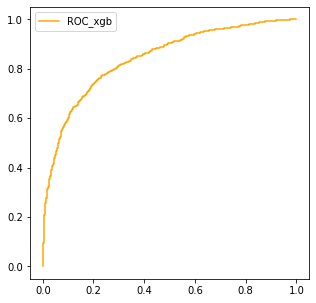

In [73]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC_xgb')
plt.savefig('CatBoost ROC', dpi=150)
plt.legend(loc=0)

In [49]:
confusion_matrix(y_test, y_pred)

array([[1401,  224],
       [ 432,  827]])